In [1]:
%load_ext autoreload
%autoreload 2

from model import *
from utils import *
from generate import *

# setup stylenet
params = StylenetArgs()
params.gpu = '0'
params.backend = 'cudnn'

dtype, multidevice, backward_device = setup_gpu(params)
stylenet = StyleNet(params, dtype, multidevice, backward_device)


VGG-19 Architecture Detected
Successfully loaded models/vgg19-d01eb7cb.pth
conv1_1: 64 3 3 3
conv1_2: 64 64 3 3
conv2_1: 128 64 3 3
conv2_2: 128 128 3 3
conv3_1: 256 128 3 3
conv3_2: 256 256 3 3
conv3_3: 256 256 3 3
conv3_4: 256 256 3 3
conv4_1: 512 256 3 3
conv4_2: 512 512 3 3
conv4_3: 512 512 3 3
conv4_4: 512 512 3 3
conv5_1: 512 512 3 3
conv5_2: 512 512 3 3
conv5_3: 512 512 3 3
conv5_4: 512 512 3 3
Setting up style layer 2: relu1_1
Setting up style layer 7: relu2_1
Setting up histogram layer 7: relu2_1
Setting up style layer 12: relu3_1
Setting up histogram layer 12: relu3_1
Setting up style layer 21: relu4_1
Setting up histogram layer 21: relu4_1
Setting up content layer 23: relu4_2
Setting up style layer 30: relu5_1
Setting up histogram layer 30: relu5_1
Sequential(
  (0): TVLoss()
  (1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): ReLU(inplace=True)
  (3): MaskedStyleLoss(
    (crit): MSELoss()
    (gram): GramMatrix()
  )
  (4): Conv2d(64, 64, kernel_

## Simple example

Note: reconsider how `input_image` works.

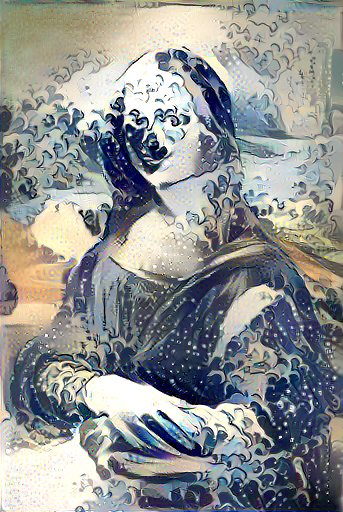

In [4]:
config = {
    'content_image': 'examples/inputs/monalisa.jpg',
    'style_image': 'examples/inputs/hokusai.jpg'
}

img = style_transfer(stylenet, config)
display(img)

## More customized

Additional parameters to customize: 
* `size`: size of canvas (default 512). Either as tuple `(h, w)` or maximum dimension.
* `style_scale`: At what scale resolution to extract style features fr om style images (deault 1.0)
* `input_image`: Start canvas from another image, rather than from random.
* `num_iterations`: How many steps for the optimization (default 1000)
* `original_colors`: Once done, transfer color distribution to that of the content image.

Note that all images, `content_image`, `style_images`, and `input_image` can all be either actual images or paths to saved images on disk.

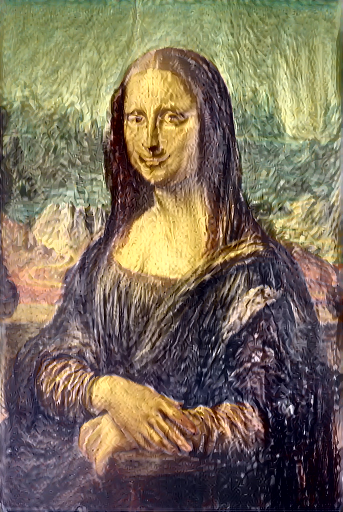

In [5]:

config = {
    'size': 512, #(1024, 768), 
    'content_image': 'examples/inputs/monalisa.jpg',
    'style_images': 'examples/inputs/starry_night.jpg',
    'style_scale': 1.0,
    'num_iterations': 1200,
    'original_colors': True
}

img = style_transfer(stylenet, config)
display(img)

## Multi-resolution

Additional parameters to customize: 
* `num_octaves`: size of canvas (default 512). Either as tuple `(w, h)` or maximum dimension.
* `octave_scale`: At what scale resolution to extract style features fr om style images (deault 1.0)
* `num_iterations` and `style_scale` can be set as 1 element, i.e. same for each resolution, or as lists


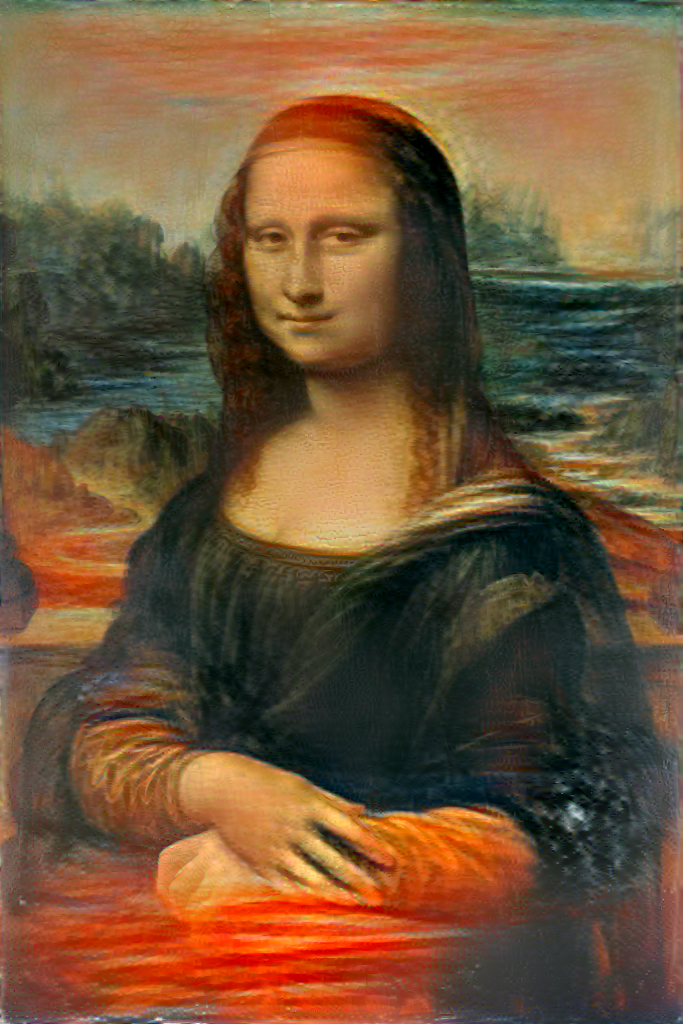

In [11]:

config = {
    'size': (1024, 683),
    'content_image': 'examples/inputs/monalisa.jpg',
    'style_images': 'examples/inputs/the_scream.jpg',
    'num_iterations': [1000, 750, 500],
    'num_octaves': 3,
    'octave_ratio': 2.0
}

img = style_transfer(stylenet, config)
display(img)

The output of an image can be saved.

In [12]:
save(img, 'my_example.png')

In [ ]:


config = {
    'size': 800,
    'num_iterations': 1000 ,#[1000, 750, 500],
    'num_octaves': 1,
    'octave_ratio': 2.0,
    'style_scale': 2.0,
    'content_image': 'examples/inputs/monalisa.jpg',
    'style_image': 'examples/inputs/starry_night.jpg'
}


config = {
    'size': (1024, 768), 
    'content_image': 'examples/inputs/monalisa.jpg',
    'style_images': ['examples/inputs/hokusai.jpg',
                     'examples/inputs/starry_night.jpg'],
    'content_masks': ['examples/segments/monalisa1b.png',
                      'examples/segments/monalisa1a.png'],
    'style_scale': 1.0,
    'num_iterations': [400, 200, 50],
    'octave_ratio': 2.31,
    'num_octaves': 3,
    'original_colors': False
}


img = style_transfer(stylenet, config)
display(img)

save(img, 'myimg.png')
